In [1]:
from collections import Counter, defaultdict
import pdb
import pickle
import sys
print(sys.path)
import yaml

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from ldm.util import instantiate_from_config
from utils.sequence_embedding import extract_sequence

['/home/xikunz/stable-diffusion/2023_6_7_supermultiplex_cell', '/home/xikunz/miniconda3/envs/ldm/lib/python38.zip', '/home/xikunz/miniconda3/envs/ldm/lib/python3.8', '/home/xikunz/miniconda3/envs/ldm/lib/python3.8/lib-dynload', '', '/home/xikunz/miniconda3/envs/ldm/lib/python3.8/site-packages', '/home/xikunz/stable-diffusion/src/taming-transformers', '/home/xikunz/stable-diffusion', '/home/xikunz/stable-diffusion/src/clip']


In [4]:
# wcm_data = "/data/xikunz/whole-cell-modeling"

# Redo filtering

In [22]:
with open("/data/wei/hpa-webdataset-all-composite/HPACombineDatasetInfo.pickle", "rb") as in_file:
    data_info = pickle.load(in_file)
len(data_info), data_info[0]

(247678,
 {'filename': '/archive/1680/1680_F4_5_',
  'if_plate_id': 1680,
  'position': 'F4',
  'sample': 5,
  'status': 35,
  'Image status name': 'Annotated / Proteinatlas',
  'locations': 'Cell Junctions',
  'staining characteristics': nan,
  'unspecific': 0.0,
  'antibody': 'HPA077995',
  'ensembl_ids': 'ENSG00000253537',
  'gene_names': 'PCDHGA7',
  'atlas_name': 'SH-SY5Y',
  'versions': '16.0,16.1,17.0',
  'earliest_version': 16.0,
  'first_released': '2016-12-04 14:00:00',
  'latest_version': 17.0,
  'Spatial cell cycle': nan,
  'Intensity cell cycle': nan,
  'Annotated cell cycle': 0.0,
  'gain': 800.0,
  'Ab state': 'IF_FAILED',
  'Max tpm': 19.76,
  'Finished in genes': nan,
  'Protocol': 'PFA',
  'Gene reliability (in release)': nan,
  'Gene reliability (lims)': nan,
  'Cell count': 24.0,
  'well_location_predictions_all': nan,
  'image_id': '77995_1680_F4_5',
  'sequences': ['>sp|Q9Y5G6|PCDG7_HUMAN Protocadherin gamma-A7 OS=Homo sapiens OX=9606 GN=PCDHGA7 PE=2 SV=1\nMAAQPRG

In [4]:
ab_states = [x["Ab state"] for x in data_info]
Counter(ab_states).most_common()

[('IF_FAILED', 89050),
 ('IF_FINISHED', 87124),
 ('IF_FURTHER_EVAL', 45364),
 ('IF_IN_PROGRESS', 20193),
 ('IF_PENDING_DESTINY', 5925),
 ('IF_PENDING', 22)]

In [23]:
filter_func = lambda x: int( x['status']) == 35 and x['Ab state'] == 'IF_FINISHED' and str(x['locations']) != "nan"
filter_func2 = lambda x: int( x['status']) == 35 and x['Ab state'] == 'IF_FINISHED'
filter_func3 = lambda x: int( x['status']) == 35 and x['Ab state'] == 'IF_FINISHED' and str(x["gene_names"]) != "nan"
filter_func4 = lambda x: int( x['status']) == 35 and x['Ab state'] == 'IF_FINISHED' and str(x["gene_names"]) != "nan" and x["sequences"]
flt_data_info = list(filter(filter_func, data_info))
flt2_data_info = list(filter(filter_func2, data_info))
flt3_data_info = list(filter(filter_func3, data_info))
flt4_data_info = list(filter(filter_func4, data_info))
len(flt_data_info), len(flt2_data_info), len(flt3_data_info), len(flt4_data_info)

(74439, 87124, 85812, 85579)

In [15]:
flt4_idcs = []
for i, x in enumerate(data_info):
    if filter_func4(x):
        flt4_idcs.append(i)
len(flt4_idcs)

85579

In [24]:
for x in flt4_data_info:
    prot = x["gene_names"]
    if "," in prot:
        print(prot)

GIMAP1,GIMAP1-GIMAP5
PRKACA,PRKACB,PRKACG
SMIM11A,SMIM11B
PRKACA,PRKACB,PRKACG
ZNF680,ZNF92
AC139530.2,SLC25A10
ENO1,ENO2,ENO3
SPANXN2,SPANXN3
EBF1,EBF3
CT45A1,CT45A10,CT45A2,CT45A3,CT45A5,CT45A6,CT45A7,CT45A8,CT45A9
AC139530.2,MRPL12
PABPC1,PABPC3
GTF2IRD2,GTF2IRD2B
AC023055.1,SARNP
PDE6G,PDE6H
BORCS8-MEF2B,MEF2B
AC008403.1,CYTH2
CCT6A,CCT6B
AC005324.3,TRIM16
UBE2A,UBE2B
GALNT4,POC1B-GALNT4
SMIM11A,SMIM11B
AP1S1,AP1S2
AL035078.4,RCN1
AL592490.1,PCDH20
COMMD7,FO393400.1
PCDHGA1,PCDHGA10,PCDHGA11,PCDHGA12,PCDHGA2,PCDHGA3,PCDHGA4,PCDHGA5,PCDHGA6,PCDHGA7,PCDHGA8,PCDHGA9,PCDHGB1,PCDHGB2,PCDHGB3,PCDHGB4,PCDHGB5,PCDHGB6,PCDHGB7,PCDHGC3,PCDHGC4,PCDHGC5
FAM47E,FAM47E-STBD1
ABHD14A,ABHD14A-ACY1
ATAD3A,ATAD3B,ATAD3C
GRAP,GRAPL
AC008982.1,ECH1
SPANXA1,SPANXA2,SPANXB1,SPANXC,SPANXD
HNRNPH1,HNRNPH2
AL592490.1,PCDH20
SH3BP1,Z83844.3
UBE2D1,UBE2D2,UBE2D3,UBE2D4
SPIN2A,SPIN2B
SET,SETSIP
GLUD1,GLUD2
DCAF12L1,DCAF12L2
GSPT1,GSPT2
RFPL1,RFPL2,RFPL3
S100A7,S100A7A
SPIN2A,SPIN2B
GSTM1,GSTM2,GSTM4,GSTM5
PRS

# Redo data split on the (protein, cell line) combination level

In [10]:
prot2seq = dict()
no_seq_prots= set()
# sample_seq = "MAAAAGPGAALSPRPCDSDPATPGAQSPKDDNEDNSNDGTQPSKRRRMGSGDSSRSCETSSQDLGFSYYPAENLIEYKWPPDETGEYYMLQEQVSEYLGVTSFKRKYPERRDLSHKEKLYLRELNVITETQCTLGLTALRSDEVIDLMIKEYPAKHAEYSVILQEKERQRITDHYKEYSQMQQQNTQKVEASKVPEYIKKAAKKAAEFNSNLNRERMEERRAYFDLQTHVIQVPQGKYKVLPTERTKVSSYPVALIPGQFQEYYKRYSPDELRYLPLNTALYEPPLDPELPALDSDGDSDDGEDGRGDEKRKNKGTSDSSSGNVSEGESPPDSQEDSFQGRQKSKDKAATPRKDGPKRSVLSKSVPGYKPKVIPNAICGICLKGKESNKKGKAESLIHCSQCENSGHPSCLDMTMELVSMIKTYPWQCMECKTCIICGQPHHEEEMMFCDMCDRGYHTFCVGLGAIPSGRWICDCCQRAPPTPRKVGRRGKNSKEG"
for x in flt3_data_info:
    prot, seqs = str(x["gene_names"]), x["sequences"]
    if seqs:
        seq = extract_sequence(seqs[0])
        if prot in prot2seq:
            assert prot2seq[prot] == seq
        else:
            prot2seq[prot] = seq
    else:
        no_seq_prots.add(prot)
# print(len(no_seq_prots))

In [57]:
no_seq_prots

{'AC008560.1',
 'APOA4',
 'ARHGAP40',
 'C10orf55',
 'C17orf51',
 'C22orf46',
 'C3orf36',
 'C4orf48',
 'C8orf44',
 'CASC10',
 'CCDC188',
 'CEACAM18',
 'COQ2',
 'ECPAS',
 'FAM182B',
 'FAM231C',
 'FTCDNL1',
 'GCNT4',
 'GLTPD2',
 'HMCN2',
 'MROH2A',
 'PATJ',
 'PBK',
 'PPP1R15B',
 'PPP5D1',
 'RUNDC1',
 'SLC5A3',
 'SMIM26',
 'TTC6',
 'WDR49',
 'ZNF286B',
 'ZNF487',
 'ZNF573',
 'ZNF654',
 'ZNF678',
 'ZSCAN12'}

In [58]:
all_prots = set(prot2seq.keys()) - no_seq_prots
prot_mapping = {l: i for i, l in enumerate(sorted(all_prots))}
len(prot_mapping)

11783

In [65]:
cls_, locs = [], []
for x in flt3_data_info:
    if str(x["gene_names"]) in all_prots:
        cls_.append(x['atlas_name'])
        locs.append(str(x["locations"]))

In [66]:
all_cls = set(cls_)
cellline_mapping = {l: i for i, l in enumerate(sorted(all_cls))}
len(cellline_mapping)

33

In [67]:
all_locs = set()
for x in flt3_data_info:
    locs = str(x['locations'])
    all_locs |= set(locs.split(","))
all_locs.remove("nan")
location_mapping = {l: i for i, l in enumerate(sorted(all_locs))}
num_locs = len(location_mapping)
print(num_locs)

33


In [68]:
comb2locs, comb2img_idcs = dict(), defaultdict(list)
for i in flt4_idcs:
    x = data_info[i]
    prot, cl, locs = x["gene_names"], x['atlas_name'], str(x['locations'])
    assert type(prot) != float
    if (prot, cl) not in comb2locs:
        comb2locs[(prot, cl)] = [0] * num_locs
    for loc in locs.split(","):
        if loc != "nan":
            comb2locs[(prot, cl)][location_mapping[loc]] = 1
    comb2img_idcs[(prot, cl)].append(i)
list(comb2locs.values())[0]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0]

In [69]:
all_combs = list(comb2locs.keys())
np.random.shuffle(all_combs)
num_combs = len(all_combs)
train_combs = all_combs[:int(0.6 * num_combs)]
valid_combs = all_combs[int(0.6 * num_combs):int(0.8 * num_combs)]
test_combs = all_combs[int(0.8 * num_combs):]
train_prots = set([prot for (prot, cl) in train_combs])
train_cls = set([cl for (prot, cl) in train_combs])
flt_valid_combs = []
for (prot, cl) in valid_combs:
    if prot not in train_prots or cl not in train_cls:
        train_combs.append((prot, cl))
        train_prots.add(prot)
        train_cls.add(cl)
    else:
        flt_valid_combs.append((prot, cl))
len(all_combs), len(train_combs), len(flt_valid_combs)

(39755, 24433, 7371)

In [70]:
flt_test_combs = []
for (prot, cl) in test_combs:
    if prot not in train_prots or cl not in train_cls:
        train_combs.append((prot, cl))
        train_prots.add(prot)
        train_cls.add(cl)
    else:
        flt_test_combs.append((prot, cl))
len(all_combs), len(train_combs), len(flt_test_combs)

(39755, 24526, 7858)

In [81]:
valid_prots = set([x[0] for x in flt_valid_combs])
valid_cls = set([x[1] for x in flt_valid_combs])
print(len(valid_prots), len(valid_cls))

test_prots = set([x[0] for x in flt_test_combs])
test_cls = set([x[1] for x in flt_test_combs])
print(len(test_prots), len(test_cls))

5904 33
6146 33


In [71]:
prot_seqs = [prot2seq[prot] for prot in sorted(all_prots)]
prot_seq_df = pd.DataFrame({"Protein": sorted(all_prots), "Sequence": prot_seqs})
prot_seq_df

,Protein,Sequence
0,A1CF,MESNHKSGDGLSGTQKEAALRALVQRTGYSLVQENGQRKYGGPPPG...
1,A4GALT,MSKPPDLLLRLLRGAPRQRVCTLFIIGFKFTFFVSIMIYWHVVGEP...
2,AAAS,MCSLGLFPPPPPRGQVTLYEHNNELVTGSSYESPPPDFRGQWINLP...
3,AACS,MSKEERPGREEILECQVMWEPDSKKNTQMDRFRAAVGAACGLALES...
4,AADAT,MNYARFITAASAARNPSPIRTMTDILSRGPKSMISLAGGLPNPNMF...
...,...,...
11778,ZXDC,MDLPALLPAPTARGGQHGGGPGPLRRAPAPLGASPARRRLLLVRGP...
11779,ZYG11A,MVHFLHPGHTPRNIVPPDAQKDALGCCVVQEEASPYTLVNICLNVL...
11780,ZYG11B,MPEDQAGAAMEEASPYSLLDICLNFLTTHLEKFCSARQDGTLCLQE...
11781,ZYX,MAAPRPSPAISVSVSAPAFYAPQKKFGPVVAPKPKVNPFRPGDSEP...


In [72]:
# prot_seq_df.to_csv(f"{wcm_data}/2023_2_3_seq_to_loc/protein_seqs.csv")

In [73]:
with open(f"{wcm_data}/2023_2_3_seq_to_loc/celllines.txt", "w") as out_file:
    for cl in sorted(all_cls):
        out_file.write(cl + "\n")

In [74]:
with open(f"{wcm_data}/2023_2_3_seq_to_loc/locations.txt", "w") as out_file:
    for loc in sorted(all_locs):
        out_file.write(loc + "\n")

In [78]:
train_combs = set(train_combs)
flt_valid_combs = set(flt_valid_combs)
flt_test_combs = set(flt_test_combs)

prot_ids, cl_ids, locs, img_idcs, partitions = [[] for _ in range(5)]
for comb in all_combs:
    prot, cl = comb
    prot_ids.append(prot_mapping[prot])
    cl_ids.append(cellline_mapping[cl])
    locs.append(comb2locs[comb])
    img_idcs.append(comb2img_idcs[comb])
    if comb in train_combs:
        partitions.append("train")
    elif comb in flt_valid_combs:
        partitions.append("valid")
    elif comb in flt_test_combs:
        partitions.append("test")
    else:
        raise ValueError("This (protein, cell line) is in none of the partitions!")
loc_df = pd.DataFrame({"protein_id": prot_ids, "celline_id": cl_ids, "locations":
                      locs, "image_idcs": img_idcs, "partition": partitions})
loc_df

,protein_id,celline_id,locations,image_idcs,partition
0,5134,29,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[25886, 91061, 176785]",train
1,1615,0,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...",[118002],train
2,7396,27,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[137268, 236913]",train
3,3154,29,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[143490],train
4,5455,17,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[127579, 195260]",train
...,...,...,...,...,...
39750,7316,30,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[33530, 77303]",test
39751,8812,12,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[24989, 234439]",test
39752,3335,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[67062, 112893]",test
39753,3569,29,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[87821, 157268]",test


In [79]:
# loc_df.to_csv(f"{wcm_data}/2023_2_3_seq_to_loc/hpa_flt4.csv")

In [5]:
loc_df = pd.read_csv(f"{wcm_data}/2023_2_3_seq_to_loc/hpa_flt4.csv", index_col=0)
loc_df

,protein_id,celline_id,locations,image_idcs,partition,u2os_prot_partition,TPM
ori_index,,,,,,,
0,5134,29,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[25886, 91061, 176785]",train,train,0.0
1,1615,0,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...",[118002],train,NaN,9.3
2,7396,27,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[137268, 236913]",train,NaN,320.4
3,3154,29,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[143490],train,train,140.2
4,5455,17,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[127579, 195260]",train,NaN,7.5
...,...,...,...,...,...,...,...
39750,7316,30,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[33530, 77303]",test,NaN,25.0
39751,8812,12,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[24989, 234439]",test,NaN,304.8
39752,3335,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[67062, 112893]",test,NaN,0.0


Text(0.5, 0, '# images corresponding to an (antibody, cell line) pair')

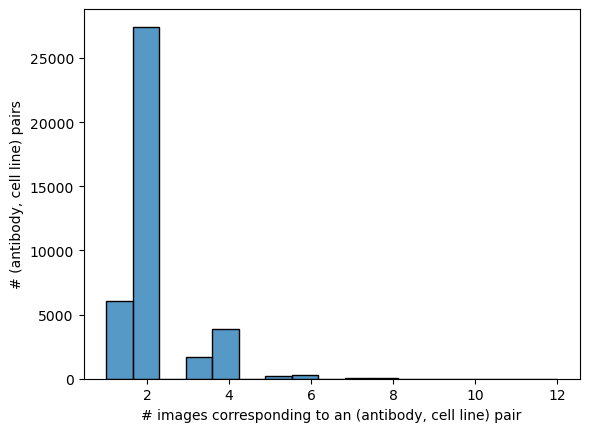

In [17]:
n_images = loc_df["image_idcs"].apply(lambda x: len(eval(x)))
fig, ax = plt.subplots()
sns.histplot(n_images, ax=ax)
ax.set_ylabel("# (antibody, cell line) pairs")
ax.set_xlabel("# images corresponding to an (antibody, cell line) pair")

In [19]:
Counter(n_images)

Counter({3: 1732,
         1: 6073,
         2: 27437,
         4: 3848,
         7: 45,
         5: 218,
         6: 320,
         11: 6,
         8: 50,
         9: 11,
         10: 13,
         12: 2})

In [15]:
loc_df["n_images"] = n_images
n_ab_images = loc_df.groupby('protein_id').n_images.sum()

Text(0.5, 0, '# images corresponding an antibody')

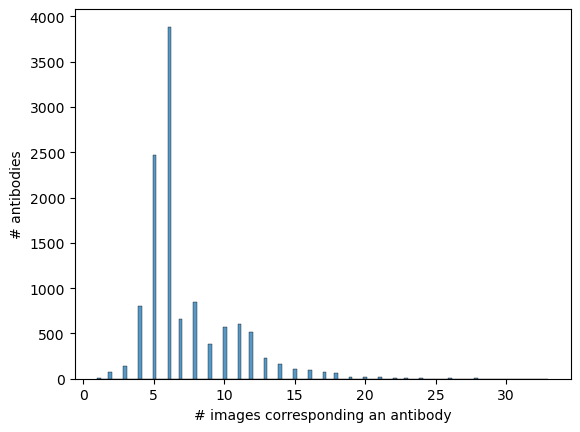

In [16]:
fig, ax = plt.subplots()
sns.histplot(n_ab_images, ax=ax)
ax.set_ylabel("# antibodies")
ax.set_xlabel("# images corresponding an antibody")

In [18]:
Counter(n_ab_images)

Counter({6: 3887,
         10: 569,
         3: 137,
         5: 2473,
         11: 600,
         9: 382,
         13: 224,
         4: 808,
         16: 97,
         8: 852,
         7: 657,
         12: 521,
         14: 161,
         19: 24,
         15: 109,
         17: 73,
         30: 2,
         18: 58,
         26: 4,
         1: 8,
         22: 10,
         23: 5,
         2: 72,
         21: 14,
         24: 9,
         20: 20,
         32: 1,
         28: 3,
         33: 1,
         25: 2})

In [20]:
sum(n_ab_images), sum(n_images)

(85579, 85579)